In [1]:
import os
import numpy as np
import math
from PIL import Image, ImageDraw
from IPython.display import display

In [2]:
with open("outputSongquan25.txt", "r") as f:
    s = f.read()
lines = s.split('\n')
lines.append("0 0 0 0 0")

group = []
alldata = []

nowTime = 0

for line in lines:
    if line == "":
        continue
    content = line.split(' ')
    time = int(content[0])
    x = int(content[1])
    y = int(content[2])
    z = int(content[3])
    d = int(content[4])
    
    if time < nowTime or time - nowTime > 5000:
        if len(group) == 9:
            alldata.append(group)
        group = []
    group.append([time, x, y, z, d])
    nowTime = time
    
    

In [3]:
for data in alldata:
    print("========")
    for line in data:
        print(line)

[18667, 49637, 7647, 1041380, 180]
[19204, 48157, 6396, 1041380, 5]
[19703, 50404, 6230, 1041280, 117]
[22730, 48858, 7613, 1041380, 208]
[22900, 50368, 6979, 1041380, 144]
[23001, 49466, 5406, 1041280, 70]
[24890, 48776, 5526, 1041380, 44]
[25912, 50342, 6055, 1041280, 110]
[26497, 48499, 7370, 1041380, 223]
[128995, 49637, 7647, 1041380, 180]
[130170, 50404, 6230, 1041280, 117]
[130665, 48157, 6396, 1041280, 5]
[132442, 48858, 7613, 1041280, 208]
[132953, 49466, 5406, 1041280, 70]
[133127, 50368, 6979, 1041280, 144]
[135456, 48776, 5526, 1041380, 44]
[136484, 50342, 6055, 1041280, 110]
[136634, 48499, 7370, 1041380, 223]
[241251, 49637, 7647, 1041380, 180]
[241883, 50404, 6230, 1041280, 117]
[242183, 48157, 6396, 1041380, 5]
[243951, 48858, 7613, 1041380, 208]
[244632, 50368, 6979, 1041280, 144]
[244956, 49466, 5406, 1041280, 70]
[246502, 48776, 5526, 1041380, 44]
[248392, 48499, 7370, 1041380, 223]
[248496, 50342, 6055, 1041280, 110]
[18435, 48157, 6396, 1041572, 5]
[18436, 50404, 6

In [4]:
for data in alldata:
    print("========")
    for line in data:
        if line[4] == 35:
            print(line)

In [13]:
center = [49295, 6548]
p1 = [48335, 6473]
p2 = [49856, 5762]
p3 = [49733, 7418]

p4 = [50230,6311]
p5 = [49071,5613]
p6 = [48564,7178]


plotCenter = [400, 400]

def getPos(x, y):
    X = -(x - center[0]) / 64 * 10 + plotCenter[0]
    Y = -(y - center[1]) / 64 * 10 + plotCenter[1]
    return Y, X

def getVarPos(x, y, theta, r):
    Theta = theta / 256 * 2 * math.pi
    X = x - r * math.sin(Theta)
    Y = y - r * math.cos(Theta)
    return X, Y

def drawCircle(x, y, r, draw, outline, fill):
    X, Y = getPos(x, y)
    draw.ellipse([X - r, Y - r, X + r, Y + r], outline=outline, fill=fill)
    
def drawCirclePos(x, y, r, draw, outline, fill):
    draw.ellipse([x - r, y - r, x + r, y + r], outline=outline, fill=fill)

[128995, 49637, 7647, 1041380, 180]
0
[130170, 50404, 6230, 1041280, 117]
1175
[130665, 48157, 6396, 1041280, 5]
1670
[132442, 48858, 7613, 1041280, 208]
3447
[132953, 49466, 5406, 1041280, 70]
3958
[133127, 50368, 6979, 1041280, 144]
4132
[135456, 48776, 5526, 1041380, 44]
6461
[136484, 50342, 6055, 1041280, 110]
7489
[136634, 48499, 7370, 1041380, 223]
7639


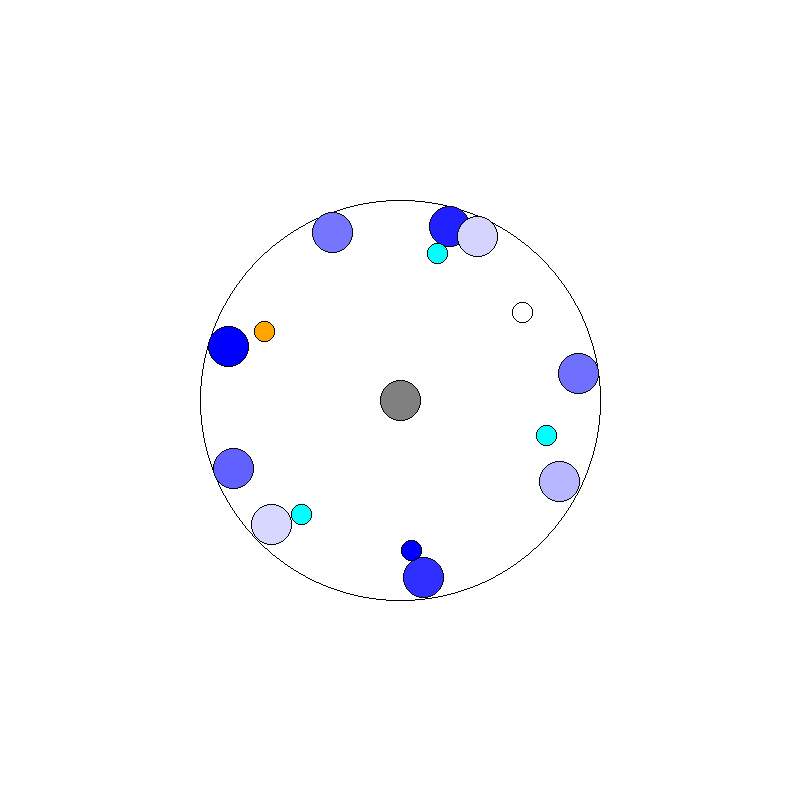

In [14]:



# battle = alldata[7]
# for line in battle:
#     drawCircle(line[1], line[2], 20, draw, 'black', 'red')

baseTime = [70000, 180000, 266000, 395000, 506000, 1000000000]


def sim(start, final):
    im = Image.new('RGB', (800, 800), 'white')
    draw = ImageDraw.Draw(im)

    drawCircle(center[0], center[1], 200, draw, 'black', 'white')
    
    n = 0
    for battle in alldata:
        n += 1
        if n != 2:
            continue
        start = 0
        for line in battle:
            if line[4] < 10000:
                # drawCircle(line[1], line[2], 20, draw, 'black', 'red')
                if start <= 10:
                    start = line[0]
                X, Y = getPos(line[1], line[2])

#                 nowBaseTime = 0
#                 for i in range(5):
#                     if line[0] > baseTime[i] and line[0] < baseTime[i+1]:
#                         nowBaseTime = baseTime[i] - 10000
#                         break
                print(line)
                print(line[0] - start)
                alpha = int(min((line[0] - start) / 9000 * 255, 255))
                        
                drawCirclePos(X, Y, 20, draw, 'black', (alpha, alpha, 255))


#                 for time in range(nowBaseTime + start, nowBaseTime + final, 100):
#                     r = (time - line[0]) / 1000 * 75
#                     # print(r)
#                     x, y = getVarPos(X, Y, line[4], r)
#                     alpha = int((time - nowBaseTime) / 35000 * 255)
#                     drawCirclePos(x, y, 20, draw, 'black', (alpha, alpha, 255))

    drawCircle(center[0], center[1], 20, draw, 'black', 'gray')
    drawCircle(p1[0], p1[1], 10, draw, 'black', 'blue')
    drawCircle(p2[0], p2[1], 10, draw, 'black', 'white')
    drawCircle(p3[0], p3[1], 10, draw, 'black', 'orange')
    
    drawCircle(p4[0], p4[1], 10, draw, 'black', 'cyan')
    drawCircle(p5[0], p5[1], 10, draw, 'black', 'cyan')
    drawCircle(p6[0], p6[1], 10, draw, 'black', 'cyan')

    display(im)
    
sim(0, 0)





In [26]:
def getAngle(C, X):
    return math.atan2(X[1]-C[1], X[0]-C[0]) / math.pi* 180
    
a1 = getAngle(center, p4)
a2 = getAngle(center, p5)
a3 = getAngle(center, p6)

print(a1)
print(a2)
print(a3)
print(a1-a2)
print(a2-a3)
print(a3-a1)


-14.223530991384088
-103.47255444007111
139.24414815898245
89.24902344868701
-242.71670259905358
153.46767915036654
